<a href="https://colab.research.google.com/github/rishuranjan74/HR_Analytics/blob/main/HR_Analytics_Minor_EDIGlobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Loading
## 1.1 Upload CSV
## 1.2 Basic Overview

# 2. Data Cleaning

# 3. Exploratory Data Analysis (EDA)
## 3.1 Univariate Analysis
## 3.2 Bivariate Analysis

# 4. Insights and Recommendations


# 1. Data Loading
## 1.1 Upload CSV and Display Sample


In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/rishuranjan74/HR_Analytics/main/employe.csv"
df = pd.read_csv(url)
df.head()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [26]:
import pandas as pd

df = pd.read_csv('employe.csv')
df.head()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [27]:
# 2.1 Show all columns
df.columns


Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [28]:
df.rename(columns={
    'satisfactoryLevel': 'satisfaction_level',
    'lastEvaluation': 'last_evaluation',
    'numberOfProjects': 'num_projects',
    'avgMonthlyHours': 'avg_monthly_hours',
    'timeSpent.company': 'time_spent',
    'workAccident': 'work_accident',
    'promotionInLast5years': 'promotion_last_5_years',
    'dept': 'department'
}, inplace=True)

# Double check new columns
df.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hours', 'time_spent', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

In [29]:
df.isnull().sum()


,0
satisfaction_level,0
last_evaluation,0
num_projects,0
avg_monthly_hours,0
time_spent,0
work_accident,0
left,0
promotion_last_5_years,0
department,0
salary,0


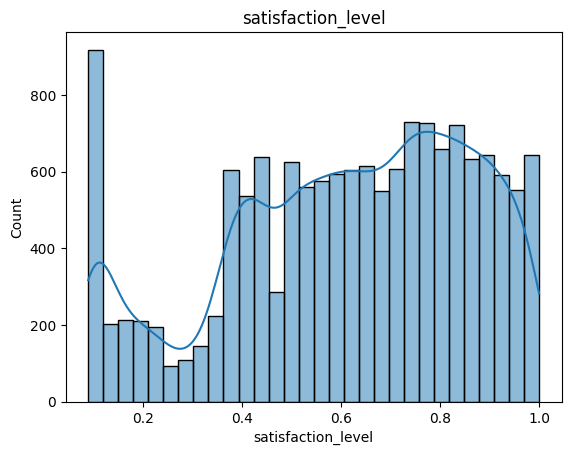

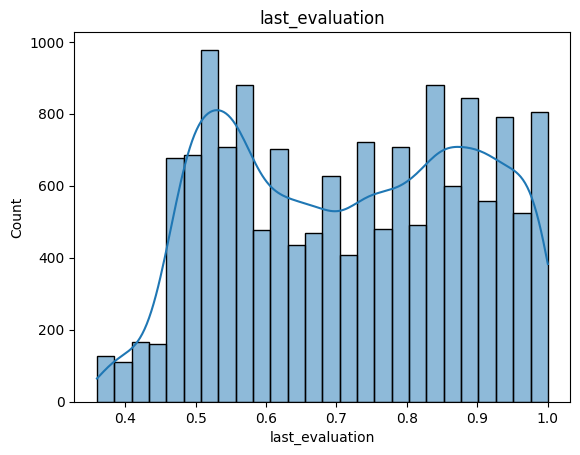

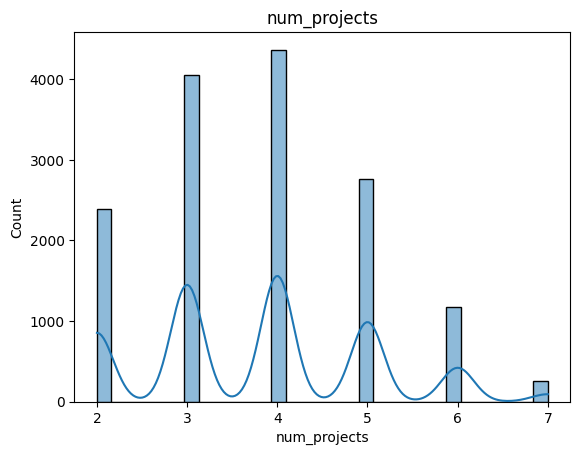

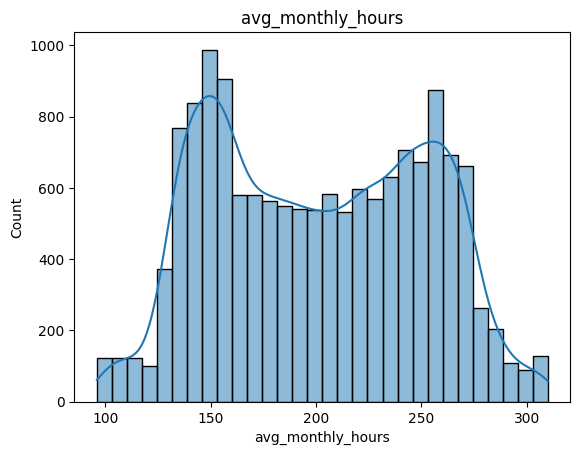

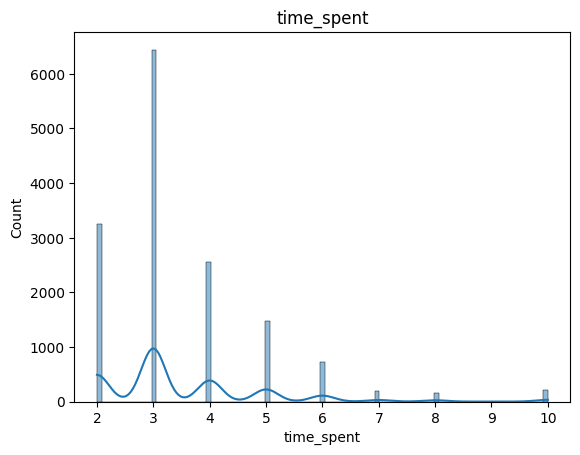

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    'satisfaction_level',
    'last_evaluation',
    'num_projects',
    'avg_monthly_hours',
    'time_spent'
]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


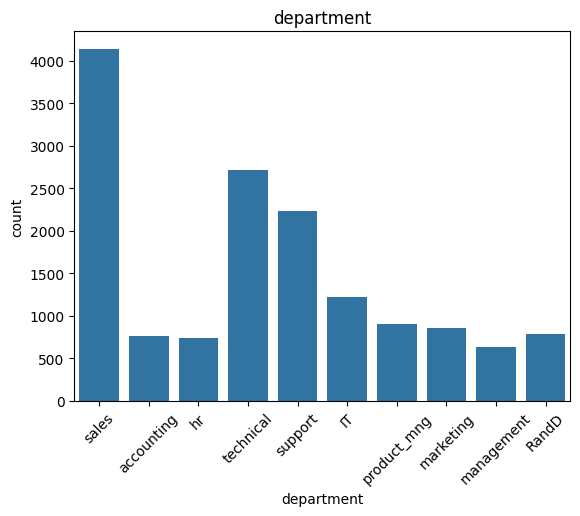

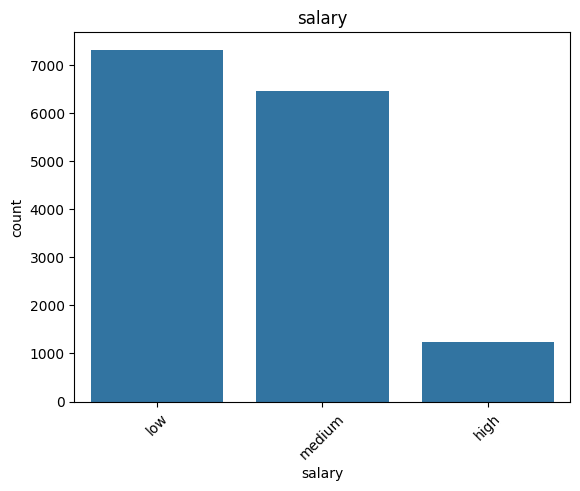

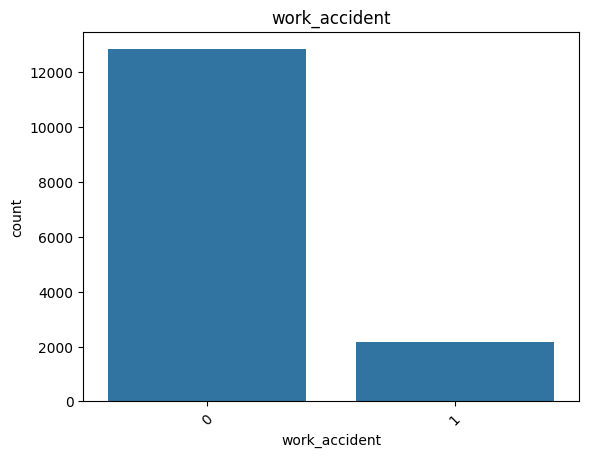

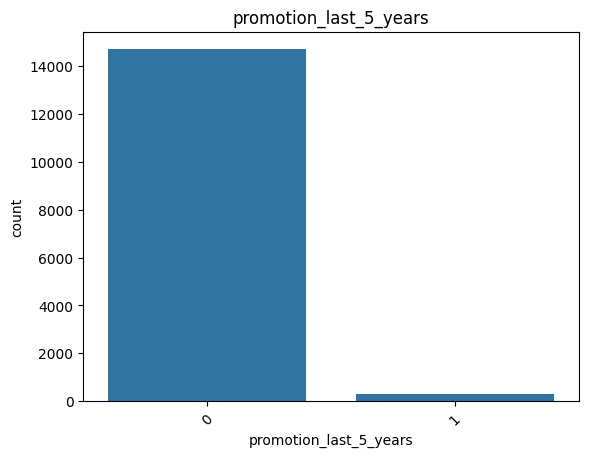

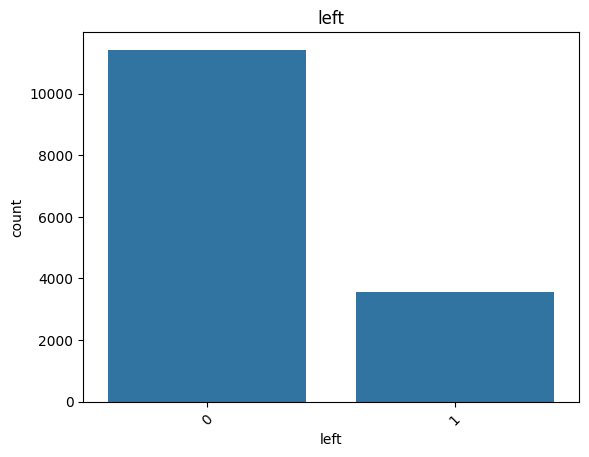

In [31]:
cat_cols = [
    'department',
    'salary',
    'work_accident',
    'promotion_last_5_years',
    'left'
]

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


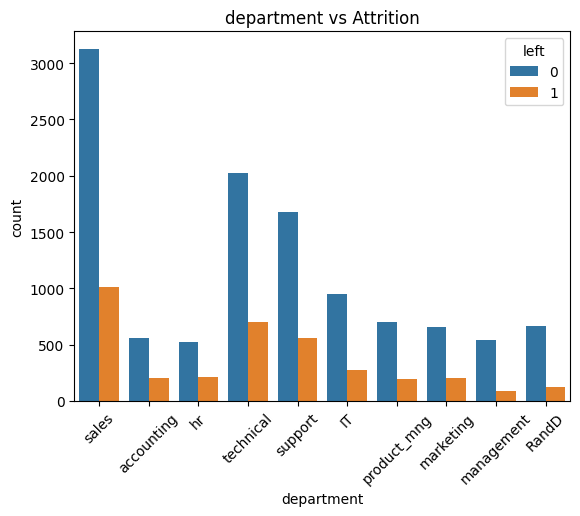

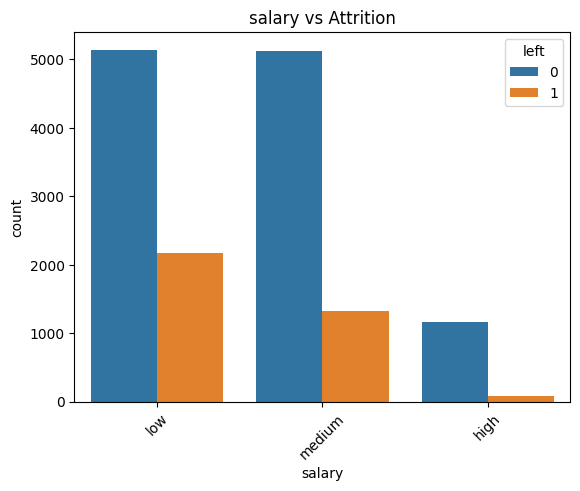

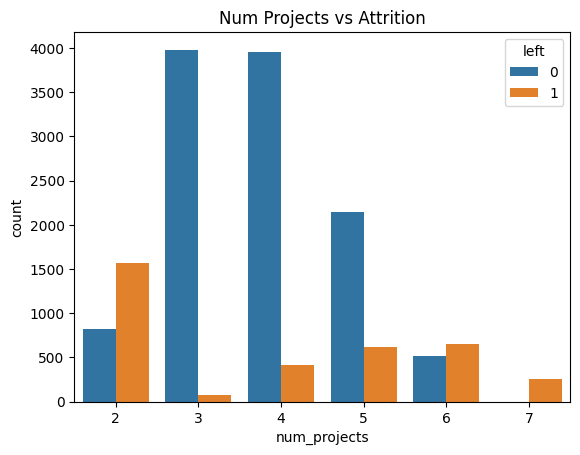

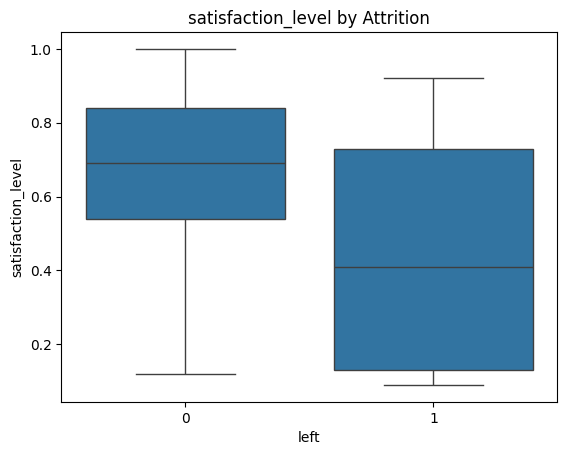

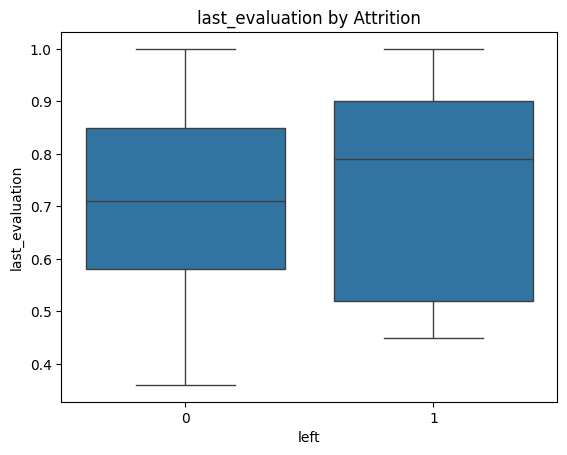

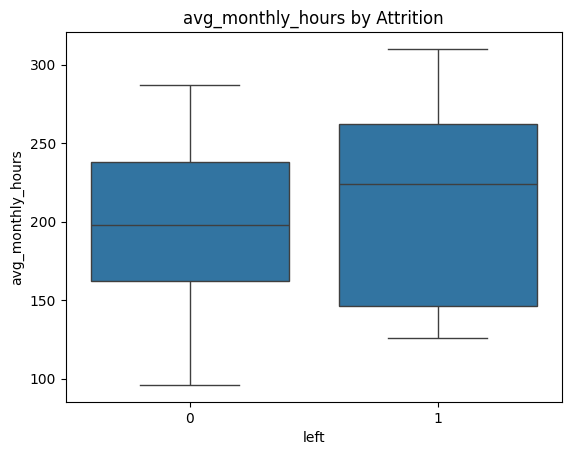

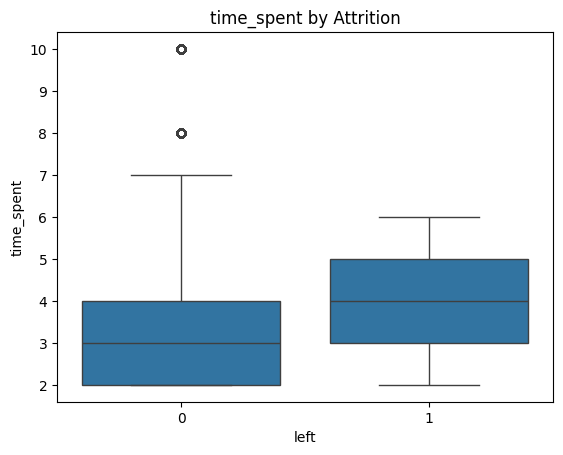

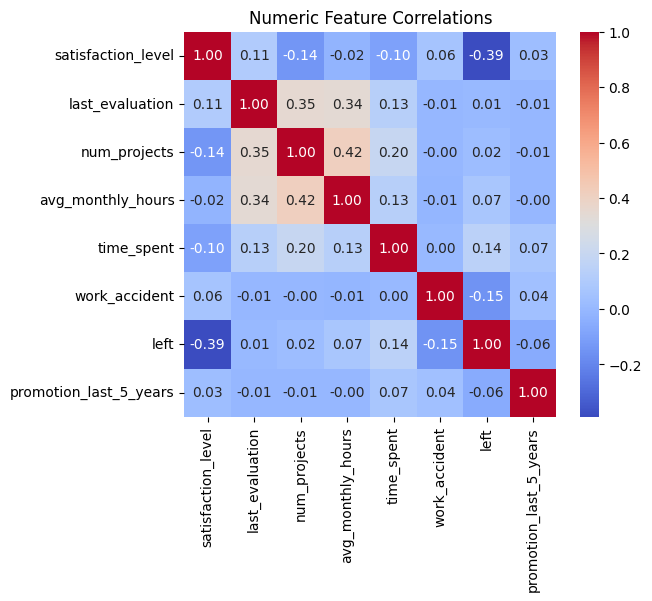

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorical vs Attrition
cat_feats = ['department', 'salary']
for col in cat_feats:
    plt.figure()
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)
    plt.show()

# 2. Num_Projects vs Attrition
plt.figure()
sns.countplot(x='num_projects', hue='left', data=df)
plt.title("Num Projects vs Attrition")
plt.show()

# 3. Satisfaction & Evaluation vs Attrition
for col in ['satisfaction_level', 'last_evaluation']:
    plt.figure()
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f"{col} by Attrition")
    plt.show()

# 4. Hours & Tenure vs Attrition
for col in ['avg_monthly_hours', 'time_spent']:
    plt.figure()
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f"{col} by Attrition")
    plt.show()
import numpy as np

# 5. Numeric Feature Correlation Heatmap
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric Feature Correlations")
plt.show()


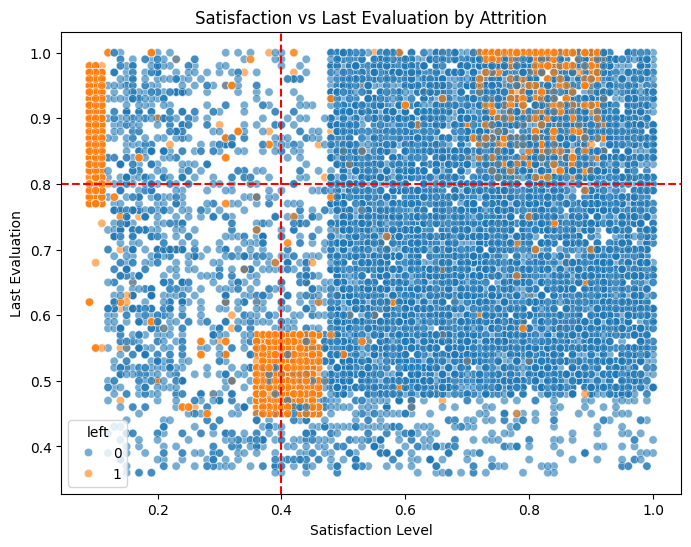

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='satisfaction_level',
    y='last_evaluation',
    hue='left',
    alpha=0.6
)
# highlight thresholds
plt.axhline(0.8, color='red', linestyle='--')
plt.axvline(0.4, color='red', linestyle='--')
plt.title('Satisfaction vs Last Evaluation by Attrition')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


left                      Stayed      Left
promotion_last_5_years                    
0                       0.758038  0.241962
1                       0.940439  0.059561


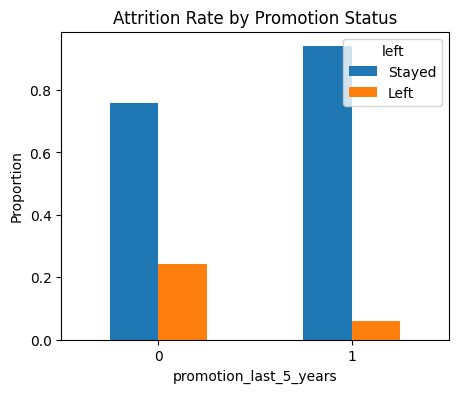

In [34]:
# Crosstab (normalized by promotion status)
promo_ct = pd.crosstab(
    df['promotion_last_5_years'],
    df['left'],
    normalize='index'
).rename(columns={0:'Stayed',1:'Left'})
print(promo_ct)

# Bar plot
promo_ct.plot(kind='bar', figsize=(5,4))
plt.title('Attrition Rate by Promotion Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


  hours_bin      left
0     <150h  0.355716
1  150–250h  0.142155
2     >250h  0.387883


/tmp/ipython-input-35-1136941572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_ct = df.groupby('hours_bin')['left'].mean().reset_index()


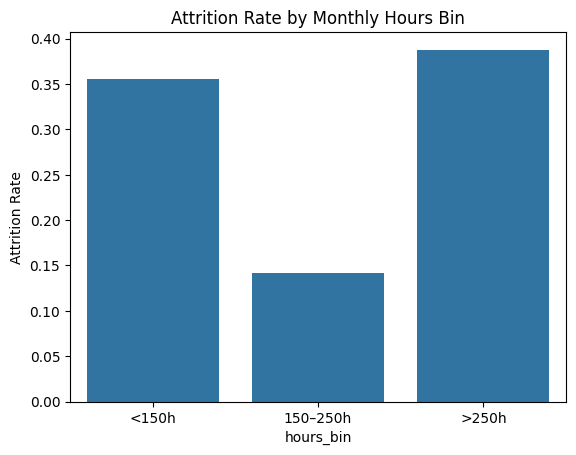

In [35]:
bins = [0,150,250,400]
labels = ['<150h','150–250h','>250h']
df['hours_bin'] = pd.cut(df['avg_monthly_hours'], bins=bins, labels=labels)

hour_ct = df.groupby('hours_bin')['left'].mean().reset_index()
print(hour_ct)

sns.barplot(x='hours_bin', y='left', data=hour_ct)
plt.title('Attrition Rate by Monthly Hours Bin')
plt.ylabel('Attrition Rate')
plt.show()


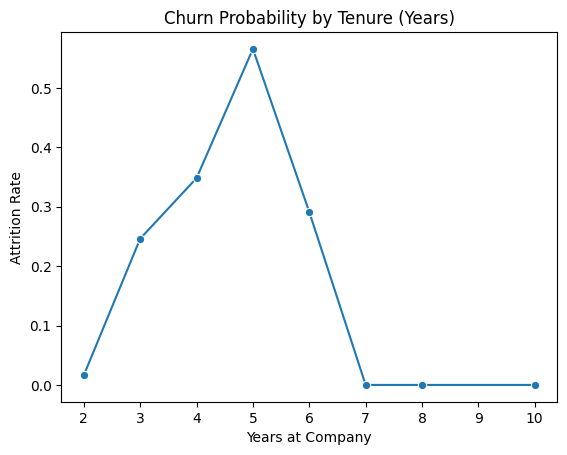

In [36]:
tenure_ct = df.groupby('time_spent')['left'].mean().reset_index()
sns.lineplot(x='time_spent', y='left', data=tenure_ct, marker='o')
plt.title('Churn Probability by Tenure (Years)')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate')
plt.show()


<Figure size 1000x600 with 0 Axes>

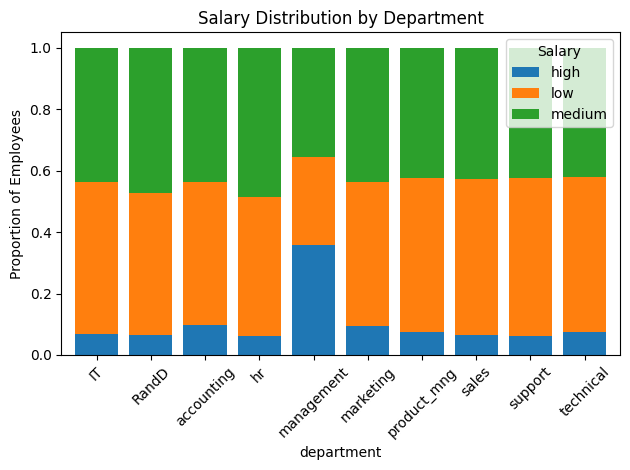

<Figure size 1200x600 with 0 Axes>

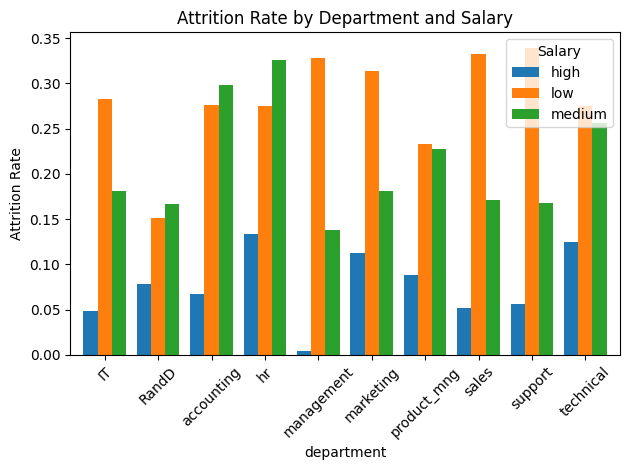

In [37]:
# 1. Salary distribution within each department
dept_salary_prop = pd.crosstab(
    df['department'],
    df['salary'],
    normalize='index'
)

plt.figure(figsize=(10,6))
dept_salary_prop.plot(
    kind='bar',
    stacked=True,
    width=0.8
)
plt.title('Salary Distribution by Department')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right')
plt.tight_layout()
plt.show()

# 2. Attrition rate by Department & Salary
dept_salary_attr = df.groupby(
    ['department','salary']
)['left'].mean().unstack()

plt.figure(figsize=(12,6))
dept_salary_attr.plot(kind='bar', width=0.8)
plt.title('Attrition Rate by Department and Salary')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right')
plt.tight_layout()
plt.show()


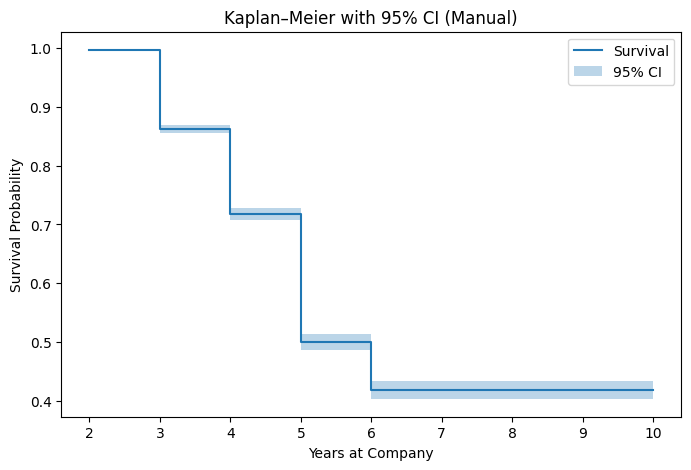

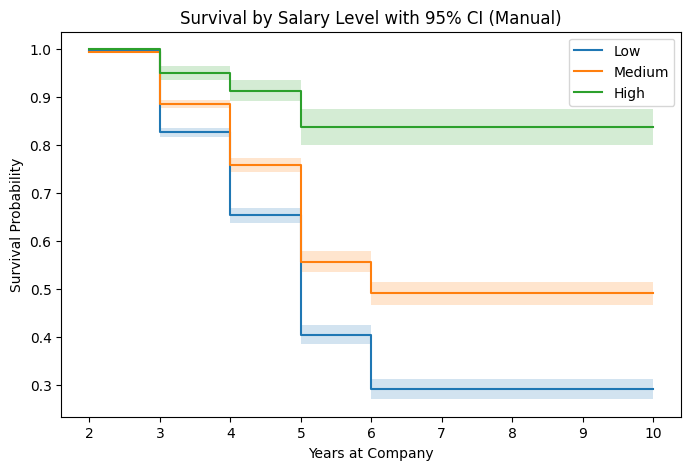

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kaplan_meier_with_ci(df, duration_col, event_col, alpha=0.05):
    """
    Compute Kaplan–Meier survival estimate + Greenwood CI.
    Returns DataFrame of time, survival_prob, lower_ci, upper_ci.
    """
    data = df[[duration_col, event_col]].sort_values(duration_col)
    times = np.sort(data[duration_col].unique())

    n_at_risk = len(data)
    surv = 1.0
    var_sum = 0.0
    records = []

    for t in times:
        # events at time t
        d_i = ((data[duration_col] == t) & (data[event_col] == 1)).sum()
        # Greenwood increment
        if n_at_risk > 0:
            var_sum += d_i / (n_at_risk * (n_at_risk - d_i)) if (n_at_risk - d_i) > 0 else 0
        # update survival
        surv *= (1 - d_i / n_at_risk) if n_at_risk > 0 else 0
        # standard error
        se = surv * np.sqrt(var_sum)
        # CI (normal approx)
        z = np.abs(np.round(np.percentile(np.random.standard_normal(1000000), 100*(1-alpha/2)),3))
        lower = max(0, surv - z*se)
        upper = min(1, surv + z*se)
        records.append((t, surv, lower, upper))
        # drop all observed at this time
        n_at_risk -= (data[duration_col] == t).sum()

    km_df = pd.DataFrame(records, columns=['time','survival','lower_ci','upper_ci'])
    return km_df

# --- Plot overall with shading ---
km_all = kaplan_meier_with_ci(df, 'time_spent', 'left')

plt.figure(figsize=(8,5))
plt.step(km_all['time'], km_all['survival'], where='post', label='Survival')
plt.fill_between(km_all['time'],
                 km_all['lower_ci'],
                 km_all['upper_ci'],
                 step='post',
                 alpha=0.3,
                 label='95% CI')
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.title('Kaplan–Meier with 95% CI (Manual)')
plt.legend()
plt.show()

# --- Plot by Salary Level with shading ---
plt.figure(figsize=(8,5))
for lvl in df['salary'].unique():
    sub = df[df['salary']==lvl]
    km = kaplan_meier_with_ci(sub, 'time_spent', 'left')
    plt.step(km['time'], km['survival'], where='post', label=f"{lvl.capitalize()}")
    plt.fill_between(km['time'],
                     km['lower_ci'],
                     km['upper_ci'],
                     step='post',
                     alpha=0.2)
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.title('Survival by Salary Level with 95% CI (Manual)')
plt.legend()
plt.show()


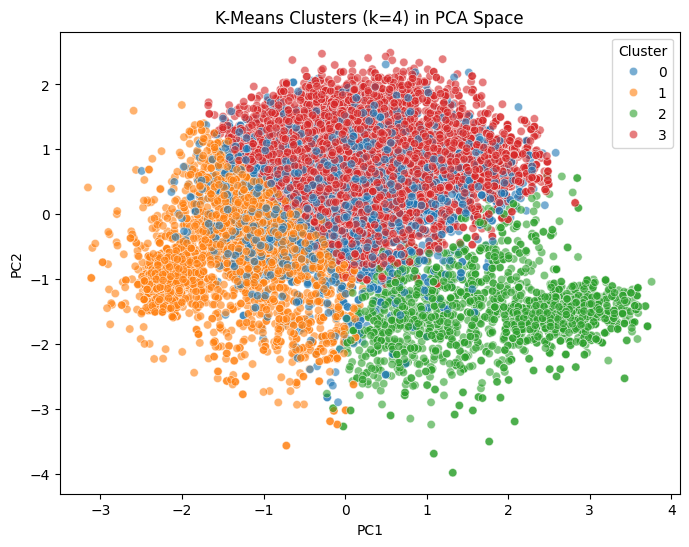

   cluster      left
0        0  0.078465
1        1  0.412136
2        2  0.477641
3        3  0.128601


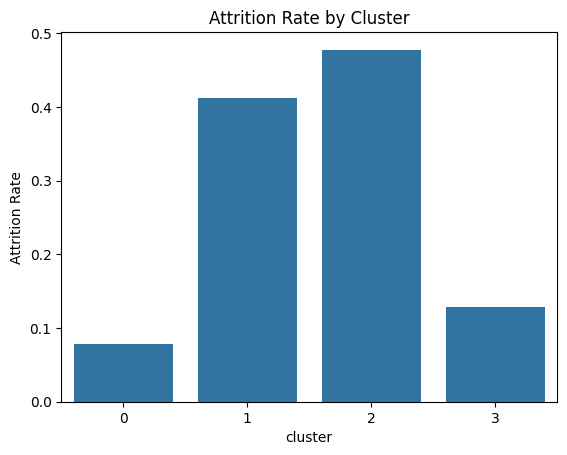

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Prepare features
df_cluster = df.copy()
# Encode categorical
df_cluster['salary_enc'] = LabelEncoder().fit_transform(df_cluster['salary'])
df_cluster['dept_enc']   = LabelEncoder().fit_transform(df_cluster['department'])
X = df_cluster[[
    'satisfaction_level','last_evaluation','num_projects',
    'avg_monthly_hours','time_spent','salary_enc','dept_enc'
]]

# 2. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA down to 2D for viz
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. K-Means (choose k=4 as a start)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Plot clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=clusters, palette='tab10', alpha=0.6
)
plt.title('K-Means Clusters (k=4) in PCA Space')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

# 6. Attach cluster labels & examine churn rate per cluster
df['cluster'] = clusters
cluster_attr = df.groupby('cluster')['left'].mean().reset_index()
print(cluster_attr)

sns.barplot(x='cluster', y='left', data=cluster_attr)
plt.title('Attrition Rate by Cluster')
plt.ylabel('Attrition Rate')
plt.show()


In [40]:
# 1. Compute cluster profiles on the original, unscaled features
profile_cols = [
    'satisfaction_level',
    'last_evaluation',
    'num_projects',
    'avg_monthly_hours',
    'time_spent',
    'salary_enc'  # numeric encoding of salary
]
cluster_profiles = df_cluster.assign(cluster=clusters) \
    .groupby('cluster')[profile_cols] \
    .mean() \
    .round(2)

print(cluster_profiles)

# 2. (Optional) Map salary_enc back to labels for readability
salary_map = dict(enumerate(LabelEncoder().fit(df['salary']).classes_))
cluster_profiles['salary_level'] = cluster_profiles['salary_enc'].map(salary_map)
cluster_profiles.drop('salary_enc', axis=1, inplace=True)

display(cluster_profiles)


         satisfaction_level  last_evaluation  num_projects  avg_monthly_hours  \
cluster                                                                         
0                      0.72             0.74          3.79             204.38   
1                      0.49             0.54          2.73             154.29   
2                      0.22             0.80          5.45             243.09   
3                      0.76             0.78          3.93             214.36   

         time_spent  salary_enc  
cluster                          
0              3.35        1.30  
1              3.18        1.33  
2              4.90        1.33  
3              3.30        1.38  


,satisfaction_level,last_evaluation,num_projects,avg_monthly_hours,time_spent,salary_level
cluster,,,,,,
0,0.72,0.74,3.79,204.38,3.35,NaN
1,0.49,0.54,2.73,154.29,3.18,NaN
2,0.22,0.80,5.45,243.09,4.90,NaN
3,0.76,0.78,3.93,214.36,3.30,NaN


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3429
           1       0.98      0.91      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.95      0.97      4500
weighted avg       0.98      0.98      0.98      4500

ROC AUC: 0.982


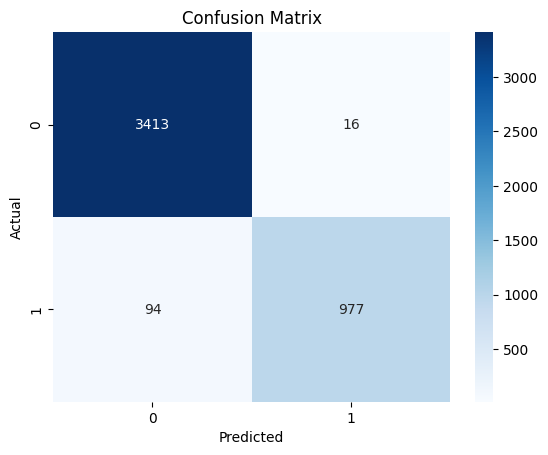

In [41]:
# 6.1: Encode categorical features
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
df_model['salary_enc']     = LabelEncoder().fit_transform(df_model['salary'])
df_model['department_enc'] = LabelEncoder().fit_transform(df_model['department'])

# 6.2: Define feature matrix X and target y
features = [
    'satisfaction_level','last_evaluation','num_projects',
    'avg_monthly_hours','time_spent',
    'salary_enc','department_enc','promotion_last_5_years','work_accident'
]
X = df_model[features]
y = df_model['left']

# 6.3: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6.4: Train a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# 6.5: Evaluate Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]), 3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [42]:
# Attrition rate by Department
dept_attr = df.groupby('department')['left'].mean().sort_values(ascending=False)
print(dept_attr)

# Attrition rate by Salary
sal_attr = df.groupby('salary')['left'].mean().sort_values(ascending=False)
print(sal_attr)

# Attrition rate by Number of Projects
proj_attr = df.groupby('num_projects')['left'].mean().sort_values(ascending=False)
print(proj_attr)


department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64
salary
low       0.296884
medium    0.204313
high      0.066289
Name: left, dtype: float64
num_projects
7    1.000000
2    0.656198
6    0.557922
5    0.221659
4    0.093700
3    0.017756
Name: left, dtype: float64
